# Financial Product Recommendation - Part 2

## Tables of Content

1. [Introduction](#1)
2. [Libraries](#2)
3. [Data Set](#3)
4. [EDA](#4)

     - [4.1 Age Range Distribution ](#4.1)
     - [4.2 Income Distribution ](#4.2)
     - [4.3 Education vs Income ](#4.3)
     - [4.4 Workclass Distribution ](#4.4)
     - [4.5 Capital Gain and Loss Analysis ](#4.5)
     - [4.6 Hours VS Income ](#4.6)
     - [4.7 Marital Status VS Income ](#4.7)
     - [4.8 Gender VS Income ](#4.8)
     - [4.9 Occupation VS Income ](#4.9)
     - [4.10 Top 7 Key Findings Across EDA ](#4.10)
     
5. [Statistical Analysis](#5)

     - [5.1 Numerical Column Correlation ](#5.1)
     - [5.2 Hypothesis Gender and Income ](#5.2)
     - [5.3 Hypothesis Hours and Income ](#5.3)
     - [5.4 Logistic Regression - Influence of Key Features ](#5.4)
     - [5.5 Statistical Analysis Key Findings ](#5.5)
     
 


## 1. Introduction<a id="1"></a>

In this notebook, we will be continung from the previous part after Data clean and  Transform to do some EDA and get some insights on Key features and Patterns


## 2. Libraries<a id="2"></a>

In [1]:
import numpy as np
import pandas as pd
import pandasql
import matplotlib.pyplot as plt
import seaborn as sn
import os

from scipy.stats import chi2_contingency,ttest_ind
import scipy.stats as stats
import statsmodels.api as sm


## 3. Dataset<a id="3"></a>

In [2]:
#loading Cleaning DataSet from the first notebook
data = pd.read_csv('/Users/bhargavdevarapalli/Downloads/Brainstation_capstone_Census/data/census_modified.csv')

print('Displaying top 10 Records : - ')
data.head(10)

Displaying top 10 Records : - 


,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,STATE-GOV,BACHELORS,13.0,NEVER-MARRIED,ADM-CLERICAL,NOT-IN-FAMILY,WHITE,MALE,2174.0,0.0,40.0,UNITED-STATES,0
1,1,50,SELF-EMP-NOT-INC,BACHELORS,13.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,0.0,0.0,13.0,UNITED-STATES,0
2,2,38,PRIVATE,HS-GRAD,9.0,DIVORCED,HANDLERS-CLEANERS,NOT-IN-FAMILY,WHITE,MALE,0.0,0.0,40.0,UNITED-STATES,0
3,3,53,PRIVATE,11TH,7.0,MARRIED-CIV-SPOUSE,HANDLERS-CLEANERS,HUSBAND,BLACK,MALE,0.0,0.0,40.0,UNITED-STATES,0
4,4,28,PRIVATE,BACHELORS,13.0,MARRIED-CIV-SPOUSE,PROF-SPECIALTY,WIFE,BLACK,FEMALE,0.0,0.0,40.0,CUBA,0
5,5,37,PRIVATE,MASTERS,14.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,WIFE,WHITE,FEMALE,0.0,0.0,40.0,UNITED-STATES,0
6,6,49,PRIVATE,9TH,5.0,MARRIED-SPOUSE-ABSENT,OTHER-SERVICE,NOT-IN-FAMILY,BLACK,FEMALE,0.0,0.0,16.0,JAMAICA,0
7,7,52,SELF-EMP-NOT-INC,HS-GRAD,9.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,0.0,0.0,45.0,UNITED-STATES,1
8,8,31,PRIVATE,MASTERS,14.0,NEVER-MARRIED,PROF-SPECIALTY,NOT-IN-FAMILY,WHITE,FEMALE,14084.0,0.0,50.0,UNITED-STATES,1
9,9,42,PRIVATE,BACHELORS,13.0,MARRIED-CIV-SPOUSE,EXEC-MANAGERIAL,HUSBAND,WHITE,MALE,5178.0,0.0,40.0,UNITED-STATES,1


## 4. EDA<a id="4"></a>

We will be going through various EDA on the columns to get some usefully insights and for testing Few Hypotheis on genenral Assumptions

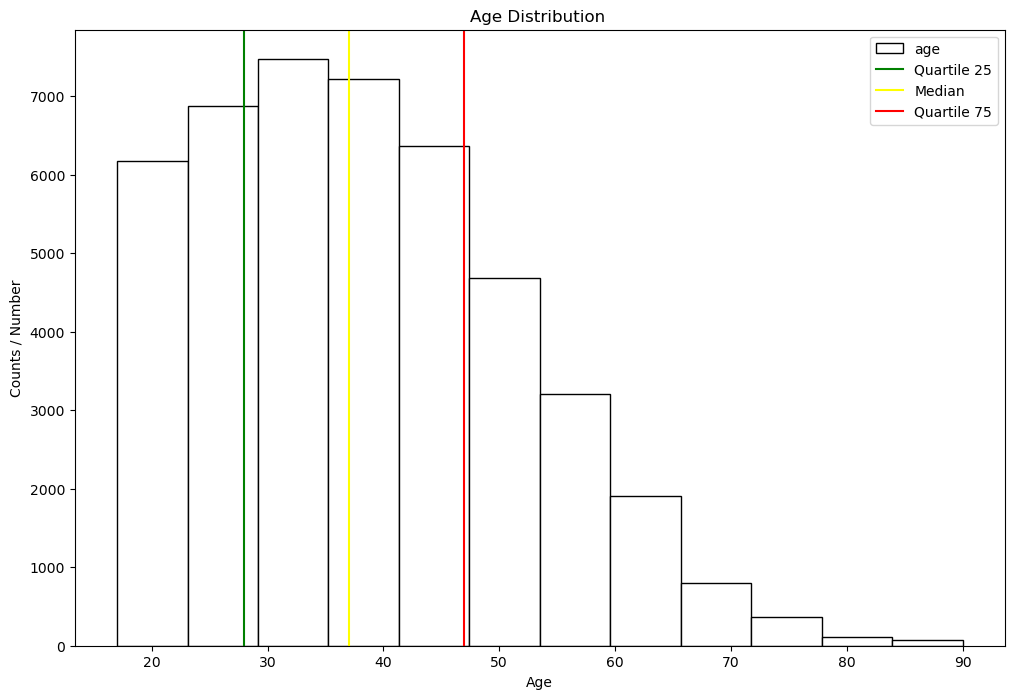

In [3]:
plt.figure(figsize=(12,8))


#Ploting Historam on Column Age
data['age'].plot(kind='hist', bins=12, color = 'white'  ,edgecolor='black')




plt.title('Age Distribution ')
plt.xlabel('Age')
plt.ylabel('Counts / Number')


#Ploting Quatile Range - 0.25/0.5/0.75
plt.axvline( data['age'].quantile(0.25), label='Quartile 25', color='green')

plt.axvline( data['age'].quantile(0.50), label='Median', color='yellow')

plt.axvline( data['age'].quantile(0.75), label='Quartile 75', color='red')

plt.legend()
plt.show()

## 4.2  Income Distribution <a id="4.2"></a>


Finding:-
1) Most people make < 50 K Dollars on a early Basis
2) IF this is a Target Column, We have to take into Consdieration for class Imbalances


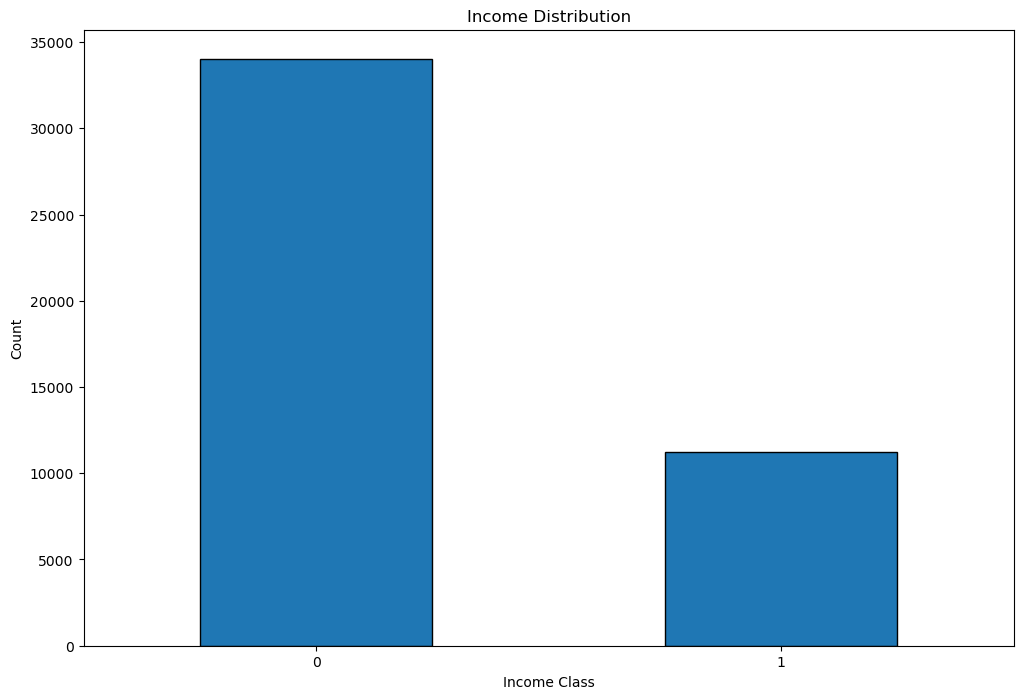

In [4]:
plt.figure(figsize=(12,8))

#Grouping income Counts
data['income'].value_counts().plot(kind='bar' , edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4.3  Education vs Income <a id="4.3"></a>


Finding:-

    1) Most people completed High School Education
    
    2) Trends Show the Higher the educational levels there is better chance of Getting Annual Salary > 50K
    
    3) People with Bachelors Degree or Higher will have higher changce of getting > 50 K dollars  


<Figure size 1200x800 with 0 Axes>

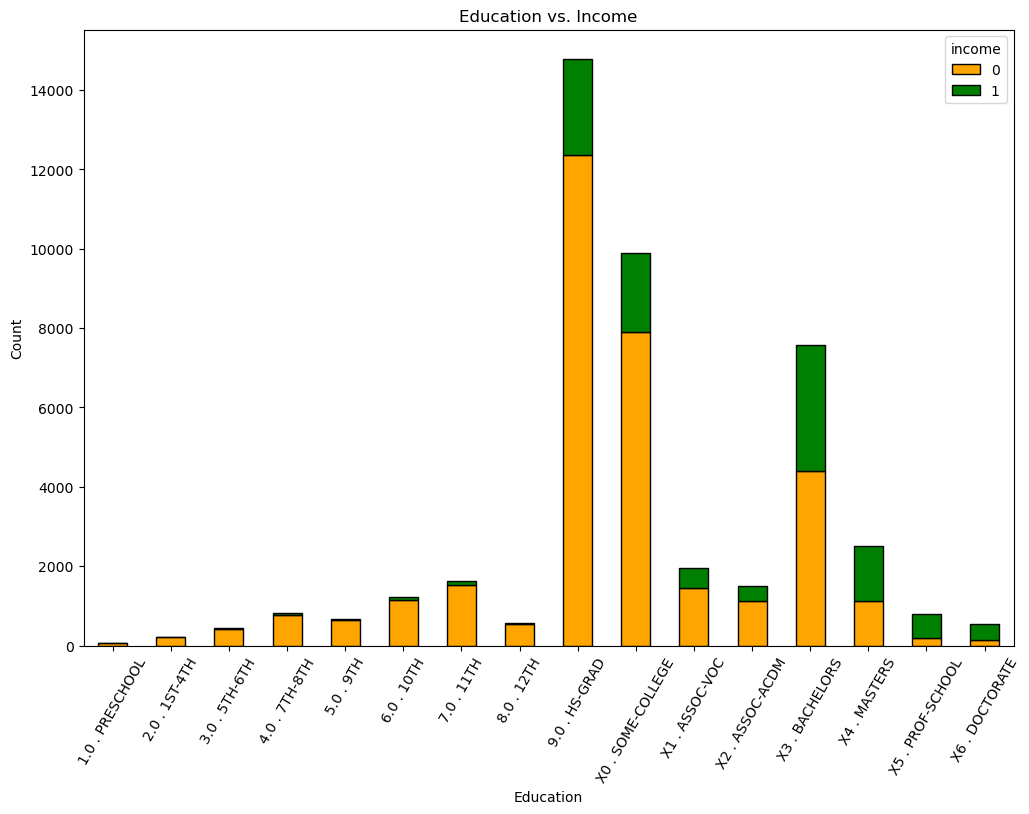

In [5]:
plt.figure(figsize=(12,8))


def number_stringconvert(abc):
  
    """
    To convert Numbers into Roman letter strings
    """

    if(abc >= 10):
        return 'X' + str(int(abc-10))
    
    else:
        return str(abc)


# Creating a New Column with combination of Education level and Degree
data['edu'] =  data['education-num'].apply(number_stringconvert) + ' . ' +  data['education_level']

# Plottign the Bar plot for various Education levels
pd.crosstab(data['edu'], data['income']).plot(kind='bar', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')
plt.title('Education vs. Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

## 4.4  Work Class Distribution <a id="4.4"></a>


Finding:-

1) Most People work for Private Firms

2) Local Governments pay less Federal Goverment related Jobs

3) Self Employed People have more than 50 % change to make more than 50 K Dollars


<Figure size 1200x800 with 0 Axes>

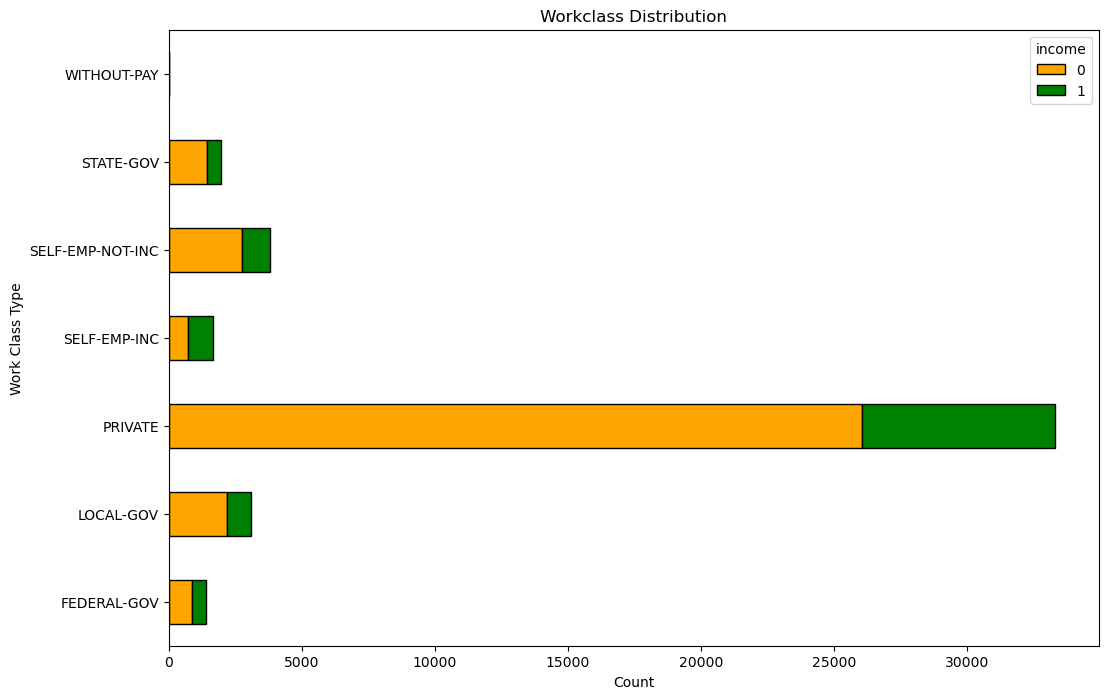

income         workclass      0     1   per
6            WITHOUT-PAY     19     2   9.5
2                PRIVATE  26056  7251  21.8
5              STATE-GOV   1426   520  26.7
4       SELF-EMP-NOT-INC   2737  1059  27.9
1              LOCAL-GOV   2185   915  29.5
0            FEDERAL-GOV    857   549  39.0
3           SELF-EMP-INC    734   912  55.4


In [6]:
plt.figure(figsize=(12,8))


#Ploting the Horizontal Barplot
pd.crosstab(data['workclass'], data['income']).plot(kind='barh', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')

plt.title('Workclass Distribution')
plt.xlabel('Count')
plt.ylabel('Work Class Type')

plt.show()


work = pd.crosstab(data['workclass'], data['income']).reset_index()


#Displaying the Work Distribution vs Income grades as a percentage
work['per'] =  round( (work[1]*100) / (work[0] + work[1]) , 1)
work = work.sort_values('per')
print(work)

## 4.5  Capital Gain and Loss Analysis  <a id="4.5"></a>


Finding:-


1) Most of the Records have 0 for Captial Gains and Losses

2) Very few records have values and can act as a Outliers

3) there is a minimum 80% chance that if Someone have Captial gains > 5 K Dollars, they will have income >50K



<Figure size 600x400 with 0 Axes>

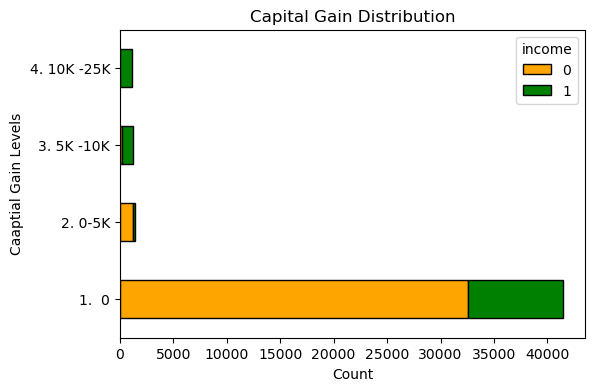

income Captial_Gain_Grade      0     1   per
0                   1.  0  32599  8833  21.3
1                 2. 0-5K   1179   273  18.8
2              3. 5K -10K    220  1032  82.4
3             4. 10K -25K     16  1070  98.5


<Figure size 600x400 with 0 Axes>

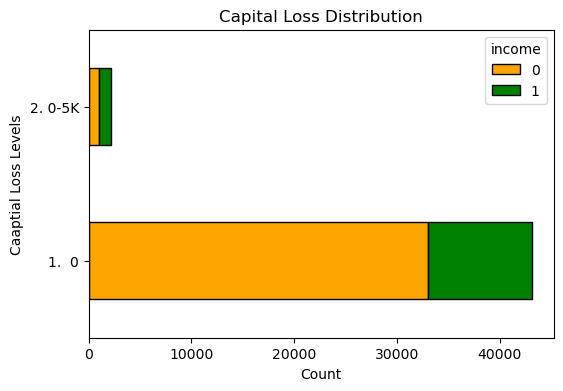

income Captial_Loss_Grade      0      1   per
0                   1.  0  32972  10110  23.5
1                 2. 0-5K   1042   1098  51.3


In [7]:
def numberic_to_grade(value):
    """
    Coverts Numberical Salary values into Salary Categories

    """
    
    if(value == 0) :
        return '1.  0'
    
    if(value<5000):
        
        return '2. 0-5K'
    
    if(value<10000):
        
        return '3. 5K -10K'
    
    
    if(value<250000):
        
        return '4. 10K -25K'
    
    
    else:
        return '5.   > 25K'


#Creating New Categorical Columns for Display Purposes
data['Captial_Gain_Grade'] = data['capital-gain'].apply(numberic_to_grade)    
data['Captial_Loss_Grade'] = data['capital-loss'].apply(numberic_to_grade)    
    

#Ploting the Horizontal Barplot

plt.figure(figsize=(6,4))

pd.crosstab(data['Captial_Gain_Grade'], data['income']).plot(kind='barh', stacked=True, figsize=(6,4), color=['orange', 'green'], edgecolor='black')
plt.title('Capital Gain Distribution')
plt.xlabel('Count')
plt.ylabel('Caaptial Gain Levels')

plt.show()



gain = pd.crosstab(data['Captial_Gain_Grade'], data['income']).reset_index()


#Displaying the Captial Gains as Percentage
gain['per'] =  round( (gain[1]*100) / (gain[0] + gain[1]) , 1)
print(gain)



plt.figure(figsize=(6,4))

pd.crosstab(data['Captial_Loss_Grade'], data['income']).plot(kind='barh', stacked=True, figsize=(6,4), color=['orange', 'green'], edgecolor='black')
plt.title('Capital Loss Distribution')
plt.xlabel('Count')
plt.ylabel('Caaptial Loss Levels')

plt.show()



loss = pd.crosstab(data['Captial_Loss_Grade'], data['income']).reset_index()


#Displaying the Captial loss as Percentage
loss['per'] =  round( (loss[1]*100) / (loss[0] + loss[1]) , 1)
print(loss)



## 4.6  Hours vs Income  <a id="4.6"></a>


Finding:-

    1) Most People work Between 30 - 60 Hours Per week
    
    2) Working More than >30 Hours Per week will increase the chance of having income > 50 K



<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

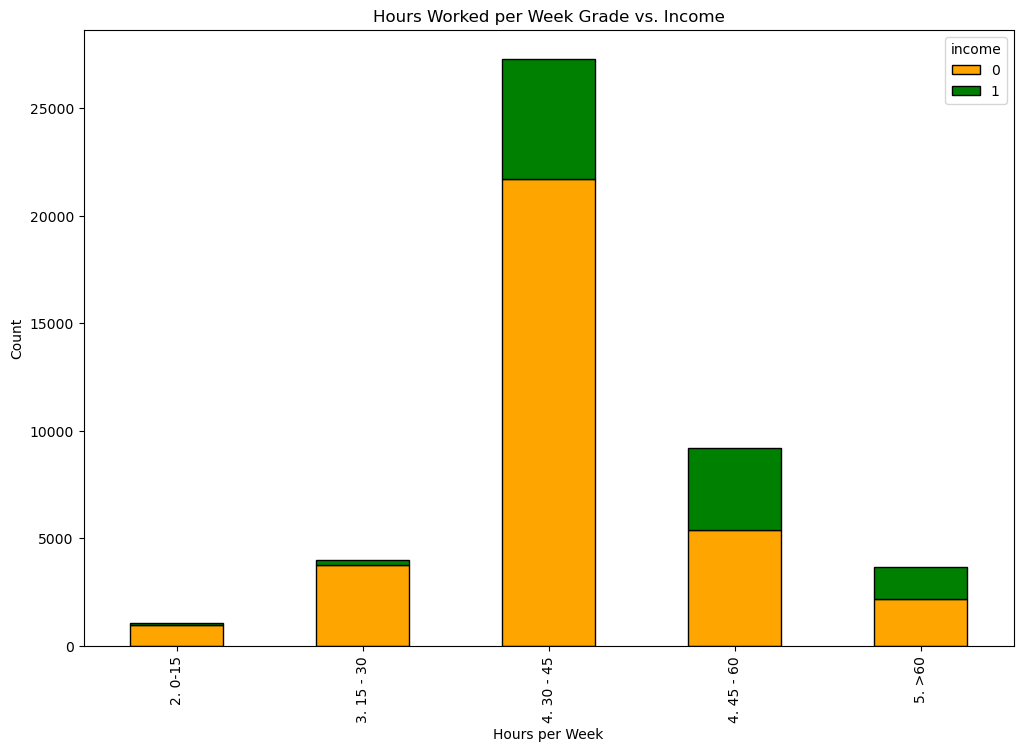

In [8]:
plt.figure(figsize=(12,8))


def hours_to_grade(value):
  
    """
    Coverts Hours worked values into Categories

    """
    
    if(value == 0) :
        return '1.  0'
    
    if(value<15):
        
        return '2. 0-15'
    
    if(value<30):
        
        return '3. 15 - 30'
    
    
    if(value< 45):
        
        return '4. 30 - 45'
    
    if(value< 60):
        
        return '4. 45 - 60'
    
    else:
        
        return '5. >60'
    
    
# Creating a New Column for Hours per week Grade
data['hour_grade'] = data['hours-per-week'].apply(hours_to_grade)


# Hours per Week vs Income
plt.figure(figsize=(12,8))
pd.crosstab(data['hour_grade'], data['income']).plot(kind='bar', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')
plt.title('Hours Worked per Week Grade vs. Income')
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.show()

## 4.7  Marital Status vs Income  <a id="4.7"></a>


Finding:-

    1) Married People have Better chance of Making >50K compared to other Categories
    
    


<Figure size 1200x800 with 0 Axes>

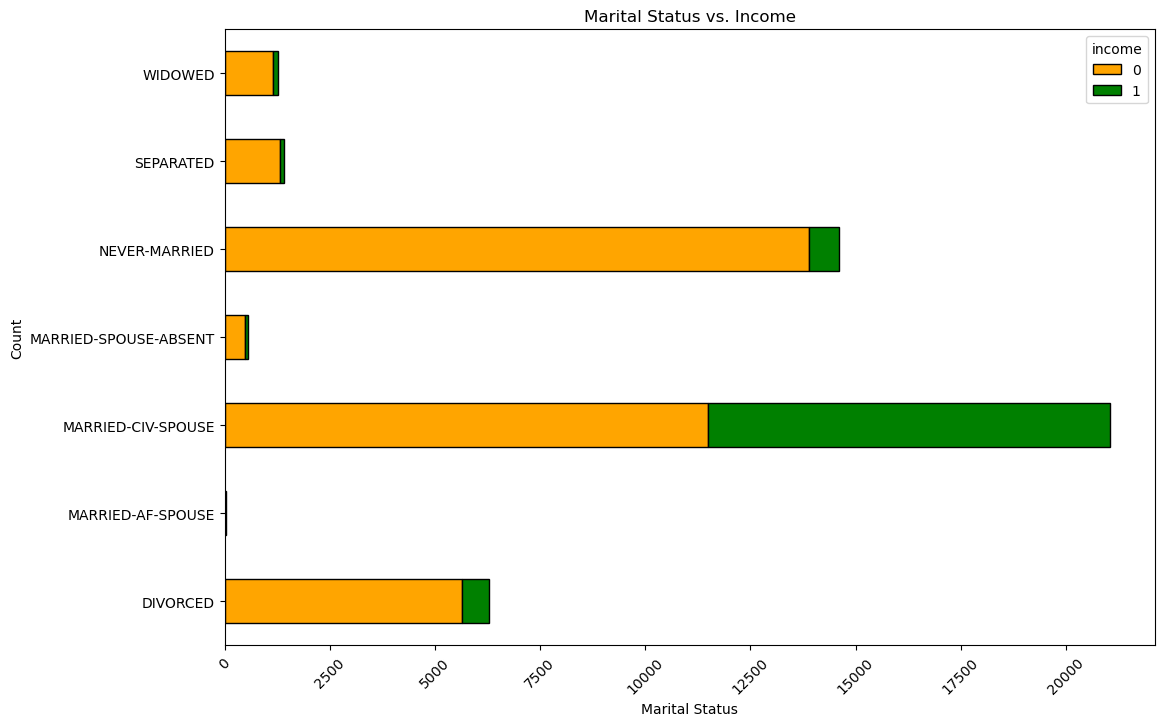

In [9]:
# Ploting Marital Status vs Income 

plt.figure(figsize=(12,8))
pd.crosstab(data['marital-status'], data['income']).plot(kind='barh', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')
plt.title('Marital Status vs. Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 4.8  Gender vs Income <a id="4.8"></a>


Finding:-

    1) Men are more likely to early Higher Income (>50 K)

    

<Figure size 1200x800 with 0 Axes>

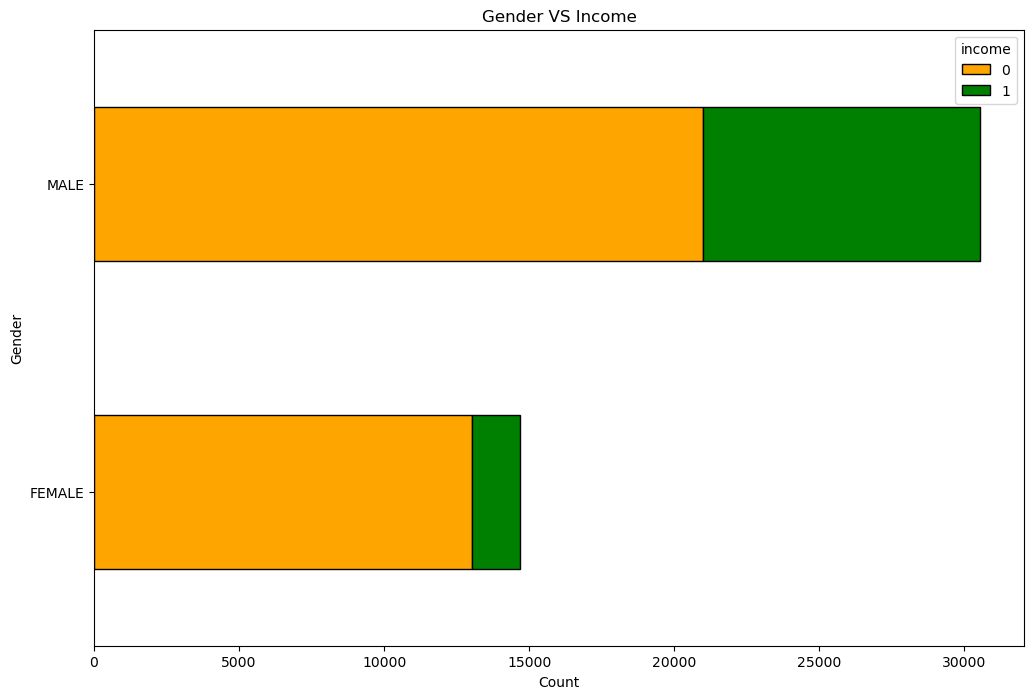

In [10]:
plt.figure(figsize=(12,8))

# Ploting Sex vs Income 
pd.crosstab(data['sex'], data['income']).plot(kind='barh', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')
plt.title('Gender VS Income')

plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

## 4.9  Occupation vs Income <a id="4.9"></a>


Finding:-

    1) Executives and Professionals have Higher chance making >50 K dollars complared to other Job Titles 

<Figure size 1200x800 with 0 Axes>

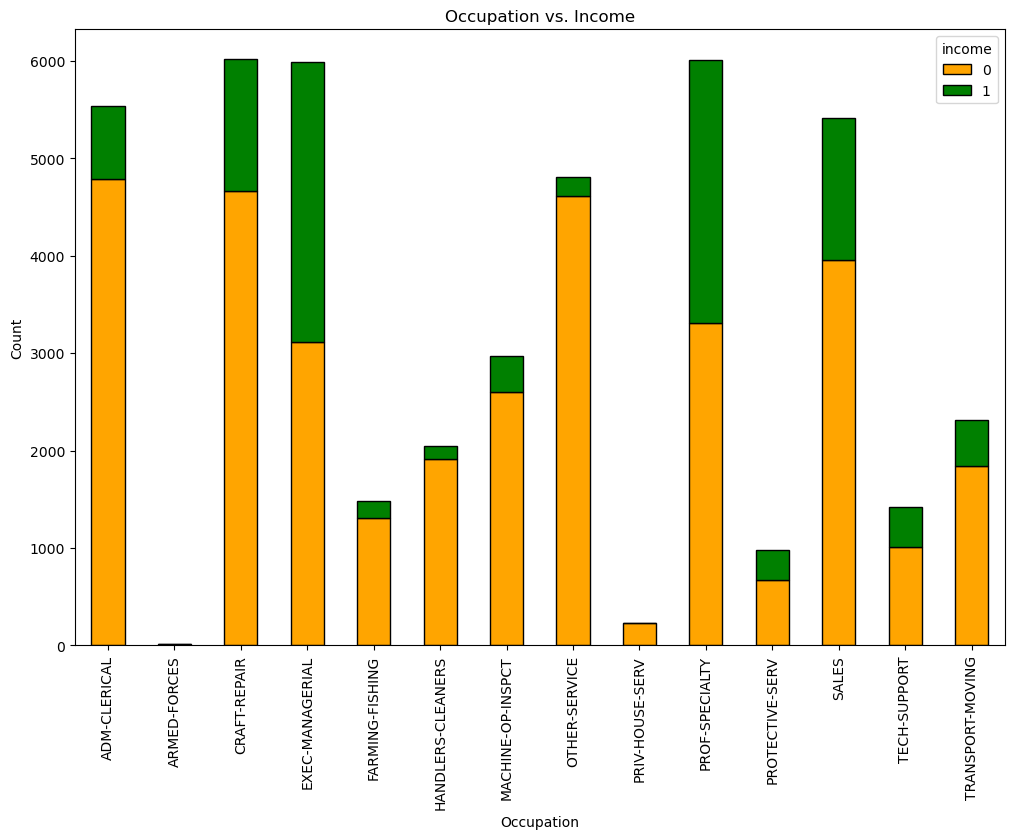

In [11]:

# Occupation vs Income
plt.figure(figsize=(12,8))
pd.crosstab(data['occupation'], data['income']).plot(kind='bar', stacked=True, figsize=(12,8), color=['orange', 'green'], edgecolor='black')
plt.title('Occupation vs. Income')
plt.xlabel('Occupation')
plt.ylabel('Count')

plt.show()

## 4.10  Top 7 Key Fndings for the Dataset <a id="4.10"></a>


    1)  Target Column (Income) is imbalanced
    2)  Most People work for Private Sector. Self Employed People has >50% change of having Higher Income (>50K)
    3)  Captial Gain column has outliers and if the Gain is >5k there is a 80 % of Higer Income(> 50K)
    4)  Males tend to earn more than Women in terms of Higher Income
    5)  Married People have better chance of having Higher Income
    6)  Occupations like (Executives and Professionals) will have higher chance of earning >50 K
    7)  People with Higer degress( Bachelors and Above) will have higher chance of earning >50 K
    


## 5  Statistical Analysis <a id="5"></a>


In this section we will be running Basic Statical Anlaysis like Correlation, Null hypothesis, Ttest and Logistic Regression



## 5.1  Numerical Column Correlation Metrics <a id="5.1"></a>


We are Generating Corrclation Heatmap across all the three Columns - Age, Education-Number,Hours-per-week


Finding:- 

    1) Looks like there is no significant Correlation between All the Numerical Columns and therefore we will have to keep all the three Columns - Age, Educational-Number,Hours-per-Week

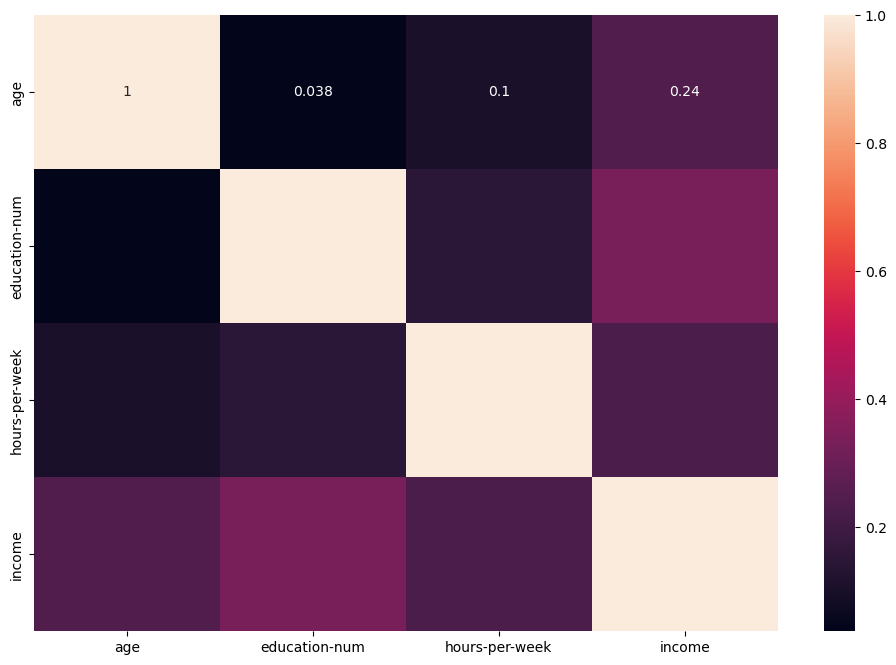

In [12]:
#HeatMap correlations
data_corr = data[['age','education-num','hours-per-week','income']].corr()


# Plot heatmap
plt.figure(figsize=(12, 8)) 
sn.heatmap(data_corr,annot=True)

# Show the plot
plt.show()

## 5.2  Hypothesis Gender and Income  <a id="5.2"></a>


Problem Statement:-

    H0 -> All Gender's will have similar Income (Null Hypothesis)
    
    H1 -> There is association Between Gender and Income (Alternate Hypothesis)


Findings :-

    P-value = 0 , Therefore we could reject the Null Hypothesis since it is < 0.05

In [13]:
#Cross Tab
temp = pd.crosstab(data['sex'], data['income'])

#Chi-Square test
chi2, p, dof, expected = chi2_contingency(temp)

#Display p-value
print('P value - {}'.format(p))

P value - 0.0


## 5.3  Hypothesis Hours and Income  <a id="5.2"></a>


Problem Statement:-

    H0 -> Mean Hours worked for two Groups 1) Earning >=50 K and 2) Earning <50 K are similar (Null Hypothesis)
    
    H1 -> Mean Hours worked for two Groups 1) Earning >=50 K and 2) Earning <50 K are different (Alternate Hypothesis)


Findings :-

    P-value = 0 , Therefore we could say that Higher Income People Tend to work more Hours compared to Lower income Group 

P value - 0.0
Less Income group Mean 39.4 and Standard Devation 12.0 
More Income group Mean 45.7 and Standard Devation 10.8 


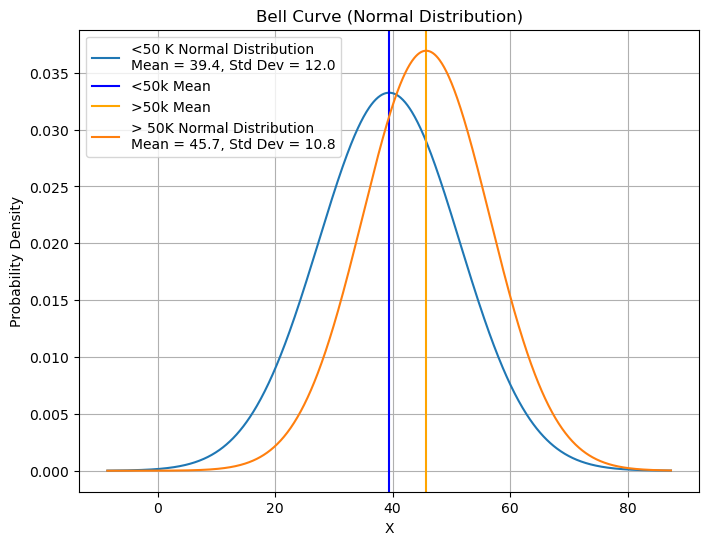

In [14]:


# Group the data by income
less50 = data[data['income'] ==  0 ]['hours-per-week']
more50 = data[data['income'] ==  1 ]['hours-per-week']

# Perform t-test
t_stat, p_val = ttest_ind(less50, more50)

# Display p-value
print('P value - {}'.format(p_val))

print('Less Income group Mean {} and Standard Devation {} '.format(round(less50.mean(),1), round(less50.std(),1)))

print('More Income group Mean {} and Standard Devation {} '.format(round(more50.mean(),1), round(more50.std(),1)))



# Parameters for the normal distribution (mean and standard deviation)
mean = round(less50.mean(),1)  # Mean
std_dev = round(less50.std(),1) # Standard deviation

mean_m = round(more50.mean(),1) 
std_dev_m = round(more50.std(),1)

# Generate x values (from mean - 4*std_dev to mean + 4*std_dev for a smooth curve)
xless = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Generate y values based on the normal distribution PDF
yless = stats.norm.pdf(xless, mean, std_dev)

# Generate x values (from mean - 4*std_dev to mean + 4*std_dev for a smooth curve)
xmore = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Generate y values based on the normal distribution PDF
ymore = stats.norm.pdf(xmore, mean_m, std_dev_m)

# Plot the bell curve
plt.figure(figsize=(8, 6))
plt.plot(xless, yless, label=f'<50 K Normal Distribution\nMean = {mean}, Std Dev = {std_dev}')

plt.axvline( mean, label='<50k Mean', color='blue')

plt.axvline( mean_m, label='>50k Mean', color='orange')

plt.plot(xmore, ymore, label=f'> 50K Normal Distribution\nMean = {mean_m}, Std Dev = {std_dev_m}')
plt.title('Bell Curve (Normal Distribution)')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## 5.4  Logistic Regression - Influence of Age,Education Level and Hours worked on Income <a id="5.4"></a>


Problem Statement:-

    Trying to find if Income variable can be explained by Age, Education Level and Hours using Logistic Regression and compalre the results based on P Value and the coeffients 


Findings :-

        1) Age: For every additional year of age, the log-odds of earning a higher income increases by 0.0472, which is statistically significant.

        2) Hours-per-week: Working more hours per week increases the log-odds of a higher income by 0.0415, also significant.
    
        3) Education-num: Higher levels of education have the largest impact, with the log-odds increasing by 0.3438 for each unit increase in the education variable.
    
    
### Overall, the model suggests that age, hours worked, and education level are significant predictors of income.

In [15]:
# The Independent Variable
X = data[['age', 'hours-per-week','education-num']]
X = sm.add_constant(X)  # Add constant (intercept)

# The dependent variable
y = data['income']

# logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Summary Results
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.454827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45218
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Oct 2024   Pseudo R-squ.:                  0.1877
Time:                        00:20:39   Log-Likelihood:                -20568.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -8.4384      0.093    -90.543      0.000      -8.621      -8.256
age              

## 5.5  Statistical Analysis Key Findings  <a id="5.5"></a>


    1)  Looks like there is no significant Correlation between All the Numerical Columns and therefore we will have to keep all the three Columns - Age, Educational-Number,Hours-per-Week
    
    2) Tested the above mentioned point through Logistic Regression model and found same three columns to be effective
    
    3) Hours Worked has a significant impact on the Income 
    
    4) Men tend to get paided higher compared to Women
 
